In [4]:
import os
import numpy as np
from keras.applications import ResNet50V2

conv_base = ResNet50V2(weights = 'imagenet',
                       #classfier를 삭제함!
                 include_top = False,
                 input_shape = (299, 299, 3))

In [6]:
conv_base.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 152, 152, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [7]:
base_dir = r'D:\dataset\dental\data'
 
data = np.load(base_dir + "\\data_ff.npy")
label = np.load(base_dir + "\\labels_angle_class_face.npy")

In [8]:
data[0]

array([[[162, 162, 157],
        [161, 161, 156],
        [163, 162, 158],
        ...,
        [162, 161, 157],
        [162, 161, 157],
        [162, 161, 157]],

       [[161, 160, 156],
        [162, 161, 157],
        [161, 160, 156],
        ...,
        [160, 159, 154],
        [159, 159, 154],
        [158, 158, 153]],

       [[163, 162, 158],
        [163, 161, 157],
        [163, 162, 158],
        ...,
        [157, 156, 151],
        [158, 159, 153],
        [158, 158, 153]],

       ...,

       [[ 81,  82,  93],
        [ 77,  79,  88],
        [ 76,  77,  86],
        ...,
        [ 76,  77,  82],
        [ 75,  74,  80],
        [ 76,  75,  81]],

       [[115, 115, 119],
        [113, 113, 117],
        [114, 113, 117],
        ...,
        [ 77,  76,  82],
        [ 78,  77,  83],
        [ 80,  79,  85]],

       [[162, 161, 156],
        [162, 161, 156],
        [162, 161, 156],
        ...,
        [ 77,  76,  83],
        [ 75,  74,  81],
        [ 76,  75,  81]]

In [9]:
label

array([3, 2, 1, 1, 2, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2, 3,
       2, 1, 1, 2, 2, 3, 1, 1, 3, 2, 3, 2, 1, 3, 2, 2, 1, 3, 2, 2, 3, 3,
       3, 2, 2, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 3, 3, 2, 3, 3, 1, 2, 2, 2, 3, 1, 1, 2, 3, 3, 3,
       1, 1, 1, 3, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1, 1,
       1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 3,
       2, 2, 1, 1, 1, 3, 3, 2, 3, 1, 3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2, 3, 2, 3,
       1, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 3, 1, 1, 3, 3, 2, 1, 2, 2,
       3, 2, 1, 3, 2, 2, 2, 1, 2, 2, 1, 3, 3, 3, 3, 2, 3, 3, 2, 1, 1, 2,
       1, 3, 3, 2, 1, 3, 3, 1, 3, 2, 2, 3, 1, 2, 1, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 3, 1, 3, 1, 1, 3, 3, 2, 3, 2, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1,
       3, 1, 1, 1, 1, 3, 2, 2, 1, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 1, 2,
       1], dtype=uint8)

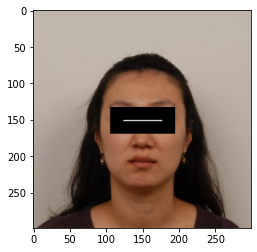

In [10]:
import matplotlib.pyplot as plt

plt.imshow(data[1])

In [11]:
data.shape

(287, 299, 299, 3)

In [12]:
extract_features = conv_base.predict(data)

In [13]:
np.save(r'D:\dataset\dental\data\extract_features.npy', extract_features)

In [14]:
features = np.load(r'D:\dataset\dental\data\extract_features.npy')

In [15]:
#features와 label을 scikit-learn으로 나누기
from sklearn.model_selection import train_test_split
train_features, test_features, train_label, test_label= train_test_split(features, label, test_size = 0.2, random_state = 123)

train_features, val_features, train_label, val_label = train_test_split(train_features, train_label, test_size = 0.2, random_state = 123)

In [16]:
print(len(train_features))
print(len(val_features))
print(len(test_features))
print(len(train_label))
print(len(val_label))
print(len(test_label))

183
46
58
183
46
58


In [17]:
from keras.utils.np_utils import to_categorical
#원 핫 인코딩을 위해 label을 바꿈
one_hot_train_labels = to_categorical(train_label - 1)
one_hot_validation_labels = to_categorical(val_label - 1)
one_hot_test_labels = to_categorical(test_label - 1)

In [18]:
one_hot_test_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0

In [19]:
from keras import models
from keras import layers
from keras import optimizers
#첫번째 모델 = conv_base부분에 동결을 넣지 않고 학습시킴
epochs = 100
#fully-connected layers
model = models.Sequential()
#flatten = 영상을 일차원으로 바꿔주는 레이어(완전연결층에 넣어주기 위해)
#reshape 건너뜀
#input_shape는 ResNet50V1에 맞게 재설정
model.add(layers.Flatten(input_shape=(10,10,2048)))
model.add(layers.Dense(256, activation='relu', input_dim=(10*10*2048)))
model.add(layers.Dropout(0.5))
#3가지로 분류해야 함으로, softmax = 확률분포 출력
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               52429056  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 52,429,827
Trainable params: 52,429,827
Non-trainable params: 0
_________________________________________________________________


In [20]:
batch_size = 20
#rmsprop보다 더 좋은 성능이 Adam이라고 한다.
model.compile(optimizer=optimizers.Adam(),
#두 확률 분포(네트워크가 출력한 확률분포 & 진짜 레이블의 분포) 사이의 거리 측정(다중 분류에서 최선)
              loss='categorical_crossentropy',
              metrics=['acc'])
              
# Train model
history = model.fit(train_features, one_hot_train_labels,
                    epochs=20,
                    batch_size=batch_size, 
                    validation_data=(val_features, one_hot_validation_labels))

Train on 183 samples, validate on 46 samples
Epoch 1/20
183/183 [==============================] - 5s 25ms/step - loss: 5009.4402 - acc: 0.3169 - val_loss: 1290.6892 - val_acc: 0.3913
Epoch 2/20
183/183 [==============================] - 5s 25ms/step - loss: 2421.0347 - acc: 0.3880 - val_loss: 1097.9111 - val_acc: 0.4348
Epoch 3/20
183/183 [==============================] - 5s 25ms/step - loss: 1994.6532 - acc: 0.3825 - val_loss: 1443.6975 - val_acc: 0.4130
Epoch 4/20
183/183 [==============================] - 5s 25ms/step - loss: 1165.6179 - acc: 0.4153 - val_loss: 417.3771 - val_acc: 0.2826
Epoch 5/20
183/183 [==============================] - 5s 25ms/step - loss: 164.7925 - acc: 0.4372 - val_loss: 22.7099 - val_acc: 0.4130
Epoch 6/20
183/183 [==============================] - 5s 25ms/step - loss: 1.9490 - acc: 0.4208 - val_loss: 2.8666 - val_acc: 0.3913
Epoch 7/20
183/183 [==============================] - 5s 25ms/step - loss: 1.0801 - acc: 0.4153 - val_loss: 1.0829 - val_acc: 0.434

In [21]:
model.save('dentalb')

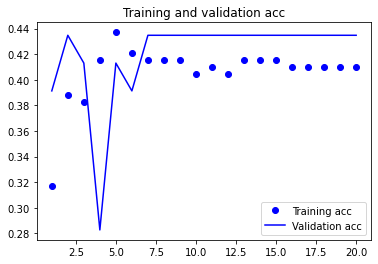

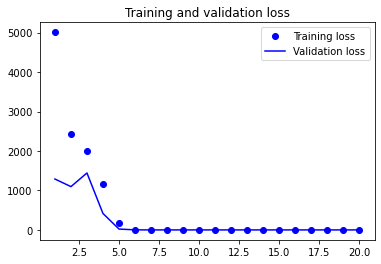

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
print(len(conv_base.trainable_weights))

172


In [25]:
conv_base.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 152, 152, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [26]:
#2번째 모델 = conv_base 모델의 output 쪽 4개의 부분만 열어놓고 학습시킴
conv_base2 = ResNet50V2(weights = 'imagenet',
                       #classfier를 삭제함!
                 include_top = False,
                 input_shape = (299, 299, 3))

In [27]:
conv_base2.trainable = True

set_trainable = False
for layer in conv_base2.layers:
    if layer.name == 'conv5_block3_3_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [40]:
print(len(conv_base2.trainable_weights))

4


In [28]:
extract_features2 = conv_base2.predict(data)

In [29]:
np.save(r'D:\dataset\dental\data\extract_features2.npy', extract_features2)
features2 = np.load(r'D:\dataset\dental\data\extract_features2.npy')

In [30]:
train_features2, test_features2, train_label2, test_label2= train_test_split(features2, label, test_size = 0.2, random_state = 123)

train_features2, val_features2, train_label2, val_label2 = train_test_split(train_features2, train_label2, test_size = 0.2, random_state = 123)

In [31]:
epochs = 100
#fully-connected layers
model2 = models.Sequential()
#flatten = 영상을 일차원으로 바꿔주는 레이어(완전연결층에 넣어주기 위해)
#reshape 건너뜀
#input_shape는 ResNet50V1에 맞게 재설정
model2.add(layers.Flatten(input_shape=(10,10,2048)))

model2.add(layers.Dense(256, activation='relu', input_dim=(10*10*2048)))
model2.add(layers.Dropout(0.5))
#3가지로 분류해야 함으로, softmax = 확률분포 출력
model2.add(layers.Dense(3, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               52429056  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 771       
Total params: 52,429,827
Trainable params: 52,429,827
Non-trainable params: 0
_________________________________________________________________


In [32]:
#원 핫 인코딩을 위해 label을 바꿈
one_hot_train_labels2 = to_categorical(train_label2 - 1)
one_hot_validation_labels2 = to_categorical(val_label2 - 1)
one_hot_test_labels2 = to_categorical(test_label2 - 1)

In [33]:
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5),
              metrics=['acc'])

history2 = model2.fit(train_features2, one_hot_train_labels2,
                    epochs=epochs,
                    batch_size=50, 
                    validation_data=(val_features2, one_hot_validation_labels2))

Train on 183 samples, validate on 46 samples
Epoch 1/100
183/183 [==============================] - 2s 13ms/step - loss: 163.7896 - acc: 0.3443 - val_loss: 36.6474 - val_acc: 0.3913
Epoch 2/100
183/183 [==============================] - 2s 12ms/step - loss: 99.9240 - acc: 0.3770 - val_loss: 76.4459 - val_acc: 0.4348
Epoch 3/100
183/183 [==============================] - 2s 11ms/step - loss: 70.5350 - acc: 0.4645 - val_loss: 54.3411 - val_acc: 0.2609
Epoch 4/100
183/183 [==============================] - 2s 11ms/step - loss: 76.5812 - acc: 0.4262 - val_loss: 23.7586 - val_acc: 0.3913
Epoch 5/100
183/183 [==============================] - 2s 12ms/step - loss: 51.6747 - acc: 0.4262 - val_loss: 43.9829 - val_acc: 0.3913
Epoch 6/100
183/183 [==============================] - 2s 11ms/step - loss: 42.5550 - acc: 0.4809 - val_loss: 29.3324 - val_acc: 0.4130
Epoch 7/100
183/183 [==============================] - 2s 11ms/step - loss: 35.4540 - acc: 0.4973 - val_loss: 17.9419 - val_acc: 0.4783
Ep

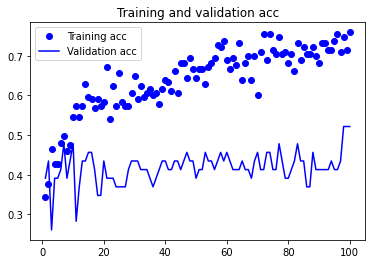

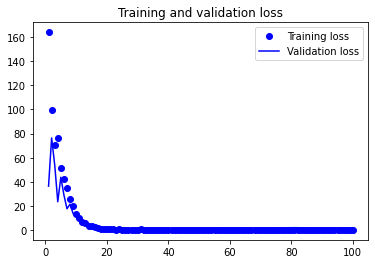

In [36]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
model2.save('dental2')

In [39]:
conv_base3 = ResNet50V2(weights = 'imagenet',
                       #classfier를 삭제함!
                 include_top = False,
                 input_shape = (299, 299, 3))

In [42]:
#3번째 모델 = base부분을 전부 닫고 classifier 부분을 조금 학습시킨 후 base를 조금 열어 다시 학습
conv_base3.trainable = False

len(conv_base3.trainable_weights)

0

In [43]:
extract_features3 = conv_base3.predict(data)

In [44]:
np.save(r'D:\dataset\dental\data\extract_features3.npy', extract_features3)
features3 = np.load(r'D:\dataset\dental\data\extract_features3.npy')

In [45]:
train_features3, test_features3, train_label3, test_label3= train_test_split(features3, label, test_size = 0.2, random_state = 123)

train_features3, val_features3, train_label3, val_label3 = train_test_split(train_features3, train_label3, test_size = 0.2, random_state = 123)

In [46]:
epochs = 100
#fully-connected layers
model3 = models.Sequential()
#flatten = 영상을 일차원으로 바꿔주는 레이어(완전연결층에 넣어주기 위해)
#reshape 건너뜀
#input_shape는 ResNet50V1에 맞게 재설정
model3.add(layers.Flatten(input_shape=(10,10,2048)))
model3.add(layers.Dense(256, activation='relu', input_dim=(10*10*2048)))
model3.add(layers.Dropout(0.5))
#3가지로 분류해야 함으로, softmax = 확률분포 출력
model3.add(layers.Dense(3, activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               52429056  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 771       
Total params: 52,429,827
Trainable params: 52,429,827
Non-trainable params: 0
_________________________________________________________________


In [47]:
#원 핫 인코딩을 위해 label을 바꿈
one_hot_train_labels3 = to_categorical(train_label3 - 1)
one_hot_validation_labels3 = to_categorical(val_label3 - 1)
one_hot_test_labels3 = to_categorical(test_label3 - 1)

In [48]:
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5),
              metrics=['acc'])

history3 = model3.fit(train_features3, one_hot_train_labels3,
                    epochs=epochs,
                    batch_size=50, 
                    validation_data=(val_features3, one_hot_validation_labels3))

Train on 183 samples, validate on 46 samples
Epoch 1/100
183/183 [==============================] - 2s 12ms/step - loss: 118.8038 - acc: 0.3279 - val_loss: 64.6704 - val_acc: 0.2826
Epoch 2/100
183/183 [==============================] - 2s 11ms/step - loss: 81.1438 - acc: 0.3825 - val_loss: 50.3558 - val_acc: 0.4348
Epoch 3/100
183/183 [==============================] - 2s 12ms/step - loss: 82.8651 - acc: 0.3607 - val_loss: 51.3494 - val_acc: 0.1957
Epoch 4/100
183/183 [==============================] - 2s 11ms/step - loss: 64.1561 - acc: 0.4044 - val_loss: 34.8419 - val_acc: 0.3261
Epoch 5/100
183/183 [==============================] - 2s 12ms/step - loss: 53.4723 - acc: 0.4262 - val_loss: 26.2180 - val_acc: 0.3261
Epoch 6/100
183/183 [==============================] - 2s 12ms/step - loss: 38.0347 - acc: 0.4208 - val_loss: 29.1765 - val_acc: 0.2826
Epoch 7/100
183/183 [==============================] - 2s 12ms/step - loss: 25.2386 - acc: 0.4918 - val_loss: 21.1627 - val_acc: 0.3261
Ep

In [52]:
model3.save('dental3')

In [50]:
conv_base3.trainable = True

set_trainable = False
for layer in conv_base3.layers:
    if layer.name == 'conv5_block3_3_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [51]:
len(model3.trainable_weights)

4

In [64]:
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5),
              metrics=['acc'])

history3 = model3.fit(train_features3, one_hot_train_labels3,
                    epochs=100,
                    batch_size=50, 
                    validation_data=(val_features3, one_hot_validation_labels3))

Train on 183 samples, validate on 46 samples
Epoch 1/100
183/183 [==============================] - 2s 12ms/step - loss: 0.9442 - acc: 0.4973 - val_loss: 1.7496 - val_acc: 0.4130
Epoch 2/100
183/183 [==============================] - 2s 11ms/step - loss: 1.1344 - acc: 0.5027 - val_loss: 1.6131 - val_acc: 0.4565
Epoch 3/100
183/183 [==============================] - 2s 11ms/step - loss: 0.9077 - acc: 0.4699 - val_loss: 1.2834 - val_acc: 0.3478
Epoch 4/100
183/183 [==============================] - 2s 11ms/step - loss: 0.9068 - acc: 0.4536 - val_loss: 1.4542 - val_acc: 0.2609
Epoch 5/100
183/183 [==============================] - 2s 11ms/step - loss: 0.9887 - acc: 0.4481 - val_loss: 1.3430 - val_acc: 0.3478
Epoch 6/100
183/183 [==============================] - 2s 11ms/step - loss: 0.9483 - acc: 0.4699 - val_loss: 1.4405 - val_acc: 0.3913
Epoch 7/100
183/183 [==============================] - 2s 11ms/step - loss: 0.9427 - acc: 0.4918 - val_loss: 1.1716 - val_acc: 0.3913
Epoch 8/100
183/1

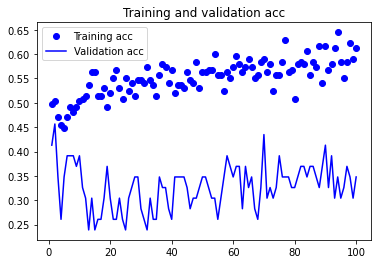

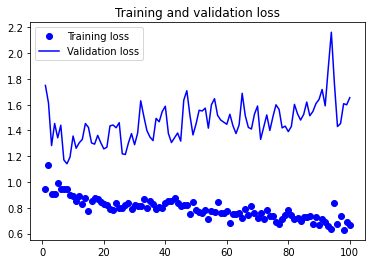

In [66]:
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss3, 'bo', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()